# Issuer Agent

In [82]:
import requests
import json
import qrcode
import uuid

In [83]:
# Set the URL for the API endpoint
# Need to specify the host as host.docker.internal as the Prism Agents and the Prism Playground are running in two isolated docker environments
base_url = "http://host.docker.internal:8080"

headers = {'Content-Type': 'application/json', 'accept': 'application/json'}

## Connections

### Create a connection record containing the invitation
```bash
curl -X 'POST' \
	'http://localhost:8080/prism-agent/connections' \
	-H 'Content-Type: application/json' \
	-d '{
		"label": "Connect with Alice"
		}' | jq
```

In [84]:
path = '/prism-agent/connections'
data = {"label": "Connect with Alice"}
# Make the request
response = requests.post(base_url + path, headers=headers, json=data)

# Check the response status code
if response.status_code == 201:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    
else:
    # Print an error message
    print("Error: The API returned a non-201 status code")

{
  "connectionId": "c446d513-21c1-4a35-812e-fe904673460f",
  "createdAt": "2022-12-12T18:32:07.973726Z",
  "invitation": {
    "from": "did:peer:2.Ez6LSktoLmM4LoMnwe8sZEvLzG7QQDdP7JYXYFt95Ewt4US6r.Vz6MkktfhpJDGiVC87v2iqxpvhjvHGq8tdhfd4CizkR1DwBTH.SeyJ0IjoiZG0iLCJzIjoiaHR0cDovL2hvc3QuZG9ja2VyLmludGVybmFsOjgwODAvZGlkY29tbSIsInIiOltdLCJhIjpbImRpZGNvbW0vdjIiXX0",
    "id": "c446d513-21c1-4a35-812e-fe904673460f",
    "invitationUrl": "https://domain.com/path?_oob=eyJpZCI6ImM0NDZkNTEzLTIxYzEtNGEzNS04MTJlLWZlOTA0NjczNDYwZiIsInR5cGUiOiJodHRwczovL2RpZGNvbW0ub3JnL291dC1vZi1iYW5kLzIuMC9pbnZpdGF0aW9uIiwiZnJvbSI6ImRpZDpwZWVyOjIuRXo2TFNrdG9MbU00TG9NbndlOHNaRXZMekc3UVFEZFA3SllYWUZ0OTVFd3Q0VVM2ci5WejZNa2t0ZmhwSkRHaVZDODd2MmlxeHB2aGp2SEdxOHRkaGZkNENpemtSMUR3QlRILlNleUowSWpvaVpHMGlMQ0p6SWpvaWFIUjBjRG92TDJodmMzUXVaRzlqYTJWeUxtbHVkR1Z5Ym1Gc09qZ3dPREF2Wkdsa1kyOXRiU0lzSW5JaU9sdGRMQ0poSWpwYkltUnBaR052YlcwdmRqSWlYWDAiLCJib2R5Ijp7ImdvYWxfY29kZSI6ImNvbm5lY3QiLCJnb2FsIjoiRXN0YWJsaXNoIGEgdHJ1c3QgY29ubmVjdGlvbiBi

### Send invitation to Holder

In [85]:
invitation = json.loads(response.content.decode())
invitationUrl = invitation['invitation']['invitationUrl']
invitationUrlbase64 = invitation['invitation']['invitationUrl'].split('=')[1]
connection_id = invitation['connectionId']
%store invitationUrlbase64

Stored 'invitationUrlbase64' (str)


### Generate QR code from invitation

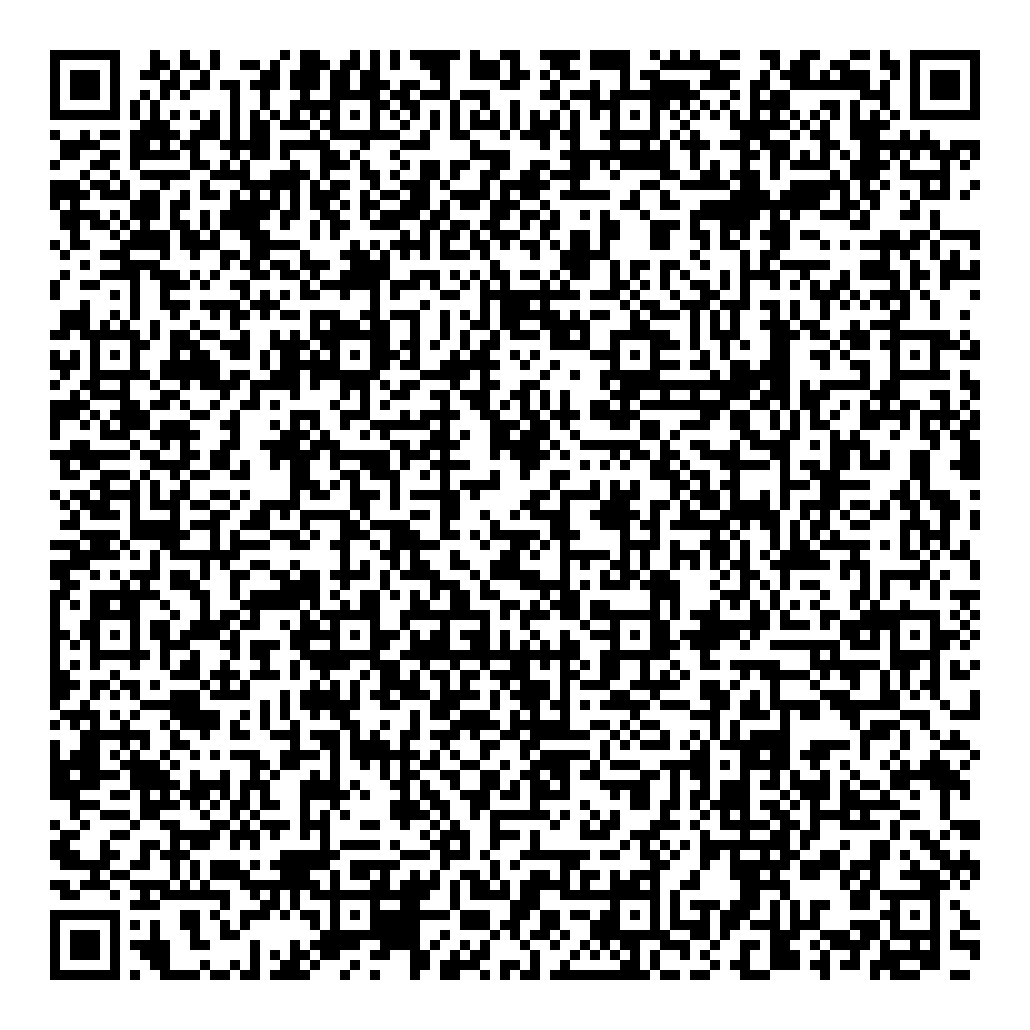

In [86]:
# Link for connection invitation
input_data = invitationUrl
# Creating an instance of qrcode
qr = qrcode.QRCode(
        version=1,
        box_size=10,
        border=5)
qr.add_data(input_data)
qr.make(fit=True)
img = qr.make_image(fill='black', back_color='white')
img.save('issuer_agent_invite_QRcode.png')

from IPython.display import Image
Image(width=400, filename='./issuer_agent_invite_QRcode.png')

### Retrieving the list of connections
```bash
curl -X 'GET' 'http://localhost:8080/prism-agent/connections' | jq
```

In [87]:
path = '/prism-agent/connections'

# Make the request
response = requests.get(base_url + path, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
else:
    # Print an error message
    print("Error: The API returned a non-200 status code")

{
  "contents": [
    {
      "connectionId": "c446d513-21c1-4a35-812e-fe904673460f",
      "createdAt": "2022-12-12T18:32:07Z",
      "invitation": {
        "from": "did:peer:2.Ez6LSktoLmM4LoMnwe8sZEvLzG7QQDdP7JYXYFt95Ewt4US6r.Vz6MkktfhpJDGiVC87v2iqxpvhjvHGq8tdhfd4CizkR1DwBTH.SeyJ0IjoiZG0iLCJzIjoiaHR0cDovL2hvc3QuZG9ja2VyLmludGVybmFsOjgwODAvZGlkY29tbSIsInIiOltdLCJhIjpbImRpZGNvbW0vdjIiXX0",
        "id": "c446d513-21c1-4a35-812e-fe904673460f",
        "invitationUrl": "https://domain.com/path?_oob=eyJpZCI6ImM0NDZkNTEzLTIxYzEtNGEzNS04MTJlLWZlOTA0NjczNDYwZiIsInR5cGUiOiJodHRwczovL2RpZGNvbW0ub3JnL291dC1vZi1iYW5kLzIuMC9pbnZpdGF0aW9uIiwiZnJvbSI6ImRpZDpwZWVyOjIuRXo2TFNrdG9MbU00TG9NbndlOHNaRXZMekc3UVFEZFA3SllYWUZ0OTVFd3Q0VVM2ci5WejZNa2t0ZmhwSkRHaVZDODd2MmlxeHB2aGp2SEdxOHRkaGZkNENpemtSMUR3QlRILlNleUowSWpvaVpHMGlMQ0p6SWpvaWFIUjBjRG92TDJodmMzUXVaRzlqYTJWeUxtbHVkR1Z5Ym1Gc09qZ3dPREF2Wkdsa1kyOXRiU0lzSW5JaU9sdGRMQ0poSWpwYkltUnBaR052YlcwdmRqSWlYWDAiLCJib2R5Ijp7ImdvYWxfY29kZSI6ImNvbm5lY3QiLCJnb2FsIjoiR

In [91]:

path = '/prism-agent//connections/' + connection_id

# Make the request
response = requests.get(base_url + path, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    their_did = loaded_json['theirDid']
else:
    # Print an error message
    print("Error: The API returned a non-200 status code")

{
  "connectionId": "c446d513-21c1-4a35-812e-fe904673460f",
  "createdAt": "2022-12-12T18:32:07Z",
  "invitation": {
    "from": "did:peer:2.Ez6LSktoLmM4LoMnwe8sZEvLzG7QQDdP7JYXYFt95Ewt4US6r.Vz6MkktfhpJDGiVC87v2iqxpvhjvHGq8tdhfd4CizkR1DwBTH.SeyJ0IjoiZG0iLCJzIjoiaHR0cDovL2hvc3QuZG9ja2VyLmludGVybmFsOjgwODAvZGlkY29tbSIsInIiOltdLCJhIjpbImRpZGNvbW0vdjIiXX0",
    "id": "c446d513-21c1-4a35-812e-fe904673460f",
    "invitationUrl": "https://domain.com/path?_oob=eyJpZCI6ImM0NDZkNTEzLTIxYzEtNGEzNS04MTJlLWZlOTA0NjczNDYwZiIsInR5cGUiOiJodHRwczovL2RpZGNvbW0ub3JnL291dC1vZi1iYW5kLzIuMC9pbnZpdGF0aW9uIiwiZnJvbSI6ImRpZDpwZWVyOjIuRXo2TFNrdG9MbU00TG9NbndlOHNaRXZMekc3UVFEZFA3SllYWUZ0OTVFd3Q0VVM2ci5WejZNa2t0ZmhwSkRHaVZDODd2MmlxeHB2aGp2SEdxOHRkaGZkNENpemtSMUR3QlRILlNleUowSWpvaVpHMGlMQ0p6SWpvaWFIUjBjRG92TDJodmMzUXVaRzlqYTJWeUxtbHVkR1Z5Ym1Gc09qZ3dPREF2Wkdsa1kyOXRiU0lzSW5JaU9sdGRMQ0poSWpwYkltUnBaR052YlcwdmRqSWlYWDAiLCJib2R5Ijp7ImdvYWxfY29kZSI6ImNvbm5lY3QiLCJnb2FsIjoiRXN0YWJsaXNoIGEgdHJ1c3QgY29ubmVjdGlvbiBiZXR3ZWV

## Issue Credential to Holder

### Initiate a new issue credential flow

Replace `{SUBJECT_ID}` with the DID of the holder displayed at startup in the his Prism Agent console logs
```bash
curl -X 'POST' \
  'http://localhost:8080/prism-agent/issue-credentials/credential-offers' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{
      "schemaId": "schema:1234",
      "subjectId": "{SUBJECT_ID}",
      "validityPeriod": 3600,
      "automaticIssuance": false,
      "awaitConfirmation": false,
      "claims": {
        "firstname": "Alice",
        "lastname": "Wonderland",
        "birthdate": "01/01/2000"
      }
	}' | jq
```

In [92]:
# subject_id = 'did:peer:2.Ez6LSsyLCEveJGeF9jWGkBCG6wvfzXcNgu5A8PAiKp3NzvPdb.Vz6MkuZxR1VDeXiJ9uL9Uuh7Rh58DGpYw3abdtacLv8KdL2sP.SeyJ0IjoiZG0iLCJzIjoiaHR0cDovL2hvc3QuZG9ja2VyLmludGVybmFsOjgwOTAvZGlkY29tbS8iLCJyIjpbXSwiYSI6WyJkaWRjb21tL3YyIl19'
path = '/prism-agent/issue-credentials/credential-offers'
data = {
      "schemaId": "schema:1234",
      "subjectId": their_did,
      "validityPeriod": 3600,
      "automaticIssuance": False,
      "awaitConfirmation": False,
      "claims": {
        "firstname": "Alice",
        "lastname": "Wonderland",
        "birthdate": "01/01/2000"
      }
    }

# Make the request
response = requests.post(base_url + path, headers=headers, json=data)

# Check the response status code
if response.status_code == 201:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    
else:
    # Print an error message
    print("Error: The API returned a non-201 status code")
    print(response.content)

{
  "automaticIssuance": false,
  "awaitConfirmation": false,
  "claims": {
    "birthdate": "01/01/2000",
    "firstname": "Alice",
    "lastname": "Wonderland"
  },
  "createdAt": "2022-12-12T18:33:32.439513Z",
  "protocolState": "OfferPending",
  "recordId": "c4357341-e47e-4aa0-b411-ebac0a6820c9",
  "role": "Issuer",
  "schemaId": "schema:1234",
  "subjectId": "did:peer:2.Ez6LSsTrRs11jqVkPPebHqdnncQZvmmyvuKrZvjBsAdPXHjt8.Vz6Mkog7ZoErip29PcRf9K5TzCsGMGqrfLeYXBP6y918dAR1L.SeyJ0IjoiZG0iLCJzIjoiaHR0cDovL2hvc3QuZG9ja2VyLmludGVybmFsOjgwOTAvZGlkY29tbSIsInIiOltdLCJhIjpbImRpZGNvbW0vdjIiXX0",
  "validityPeriod": 3600.0
}


In [93]:
credential_record_id = loaded_json['recordId']
%store credential_record_id

Stored 'credential_record_id' (str)


In [95]:
path = '/prism-agent/issue-credentials/records'

# Make the request
response = requests.get(base_url + path, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    
else:
    # Print an error message
    print("Error: The API returned a non-200 status code")
    print(response.content)

{
  "count": 1,
  "items": [
    {
      "automaticIssuance": false,
      "awaitConfirmation": false,
      "claims": {
        "birthdate": "01/01/2000",
        "firstname": "Alice",
        "lastname": "Wonderland"
      },
      "createdAt": "2022-12-12T18:33:32Z",
      "protocolState": "RequestReceived",
      "recordId": "c4357341-e47e-4aa0-b411-ebac0a6820c9",
      "role": "Issuer",
      "schemaId": "schema:1234",
      "subjectId": "did:peer:2.Ez6LSsTrRs11jqVkPPebHqdnncQZvmmyvuKrZvjBsAdPXHjt8.Vz6Mkog7ZoErip29PcRf9K5TzCsGMGqrfLeYXBP6y918dAR1L.SeyJ0IjoiZG0iLCJzIjoiaHR0cDovL2hvc3QuZG9ja2VyLmludGVybmFsOjgwOTAvZGlkY29tbSIsInIiOltdLCJhIjpbImRpZGNvbW0vdjIiXX0",
      "updatedAt": "2022-12-12T18:34:05Z",
      "validityPeriod": 3600.0
    }
  ],
  "limit": 0,
  "offset": 0
}


### - Issuing the credential

> Replace `{RECORD_ID}` with the UUID of the record from the previous list
```bash
curl -X 'POST' 'http://localhost:8080/prism-agent/issue-credentials/records/{RECORD_ID}/issue-credential' | jq
```

In [96]:
path = '/prism-agent/issue-credentials/records/' + credential_record_id + '/issue-credential'
# Make the request
response = requests.post(base_url + path, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    
else:
    # Print an error message
    print("Error: The API returned a non-200 status code")
    print(response.content)

{
  "automaticIssuance": false,
  "awaitConfirmation": false,
  "claims": {
    "birthdate": "01/01/2000",
    "firstname": "Alice",
    "lastname": "Wonderland"
  },
  "createdAt": "2022-12-12T18:33:32Z",
  "protocolState": "CredentialPending",
  "recordId": "c4357341-e47e-4aa0-b411-ebac0a6820c9",
  "role": "Issuer",
  "schemaId": "schema:1234",
  "subjectId": "did:peer:2.Ez6LSsTrRs11jqVkPPebHqdnncQZvmmyvuKrZvjBsAdPXHjt8.Vz6Mkog7ZoErip29PcRf9K5TzCsGMGqrfLeYXBP6y918dAR1L.SeyJ0IjoiZG0iLCJzIjoiaHR0cDovL2hvc3QuZG9ja2VyLmludGVybmFsOjgwOTAvZGlkY29tbSIsInIiOltdLCJhIjpbImRpZGNvbW0vdjIiXX0",
  "updatedAt": "2022-12-12T18:34:37Z",
  "validityPeriod": 3600.0
}


In [98]:
path = '/prism-agent/issue-credentials/records'

# Make the request
response = requests.get(base_url + path, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    
else:
    # Print an error message
    print("Error: The API returned a non-200 status code")
    print(response.content)

{
  "count": 1,
  "items": [
    {
      "automaticIssuance": false,
      "awaitConfirmation": false,
      "claims": {
        "birthdate": "01/01/2000",
        "firstname": "Alice",
        "lastname": "Wonderland"
      },
      "createdAt": "2022-12-12T18:33:32Z",
      "jwtCredential": "ImV5SjBlWEFpT2lKS1YxUWlMQ0poYkdjaU9pSkZVekkxTmlKOS5leUpwYzNNaU9pSmthV1E2Y0hKcGMyMDZaR05tWWpBMFl6Z3RaREF4WWkwME16QXdMVGxrTVRRdE56UTBORFV3WW1Fek9HUTFJaXdpYzNWaUlqb2laR2xrT25CbFpYSTZNaTVGZWpaTVUzTlVjbEp6TVRGcWNWWnJVRkJsWWtoeFpHNXVZMUZhZG0xdGVYWjFTM0phZG1wQ2MwRmtVRmhJYW5RNExsWjZOazFyYjJjM1dtOUZjbWx3TWpsUVkxSm1PVXMxVkhwRGMwZE5SM0Z5Wmt4bFdWaENVRFo1T1RFNFpFRlNNVXd1VTJWNVNqQkphbTlwV2tjd2FVeERTbnBKYW05cFlVaFNNR05FYjNaTU1taDJZek5SZFZwSE9XcGhNbFo1VEcxc2RXUkhWbmxpYlVaelQycG5kMDlVUVhaYVIyeHJXVEk1ZEdKVFNYTkpia2xwVDJ4MFpFeERTbWhKYW5CaVNXMVNjRnBIVG5aaVZ6QjJaR3BKYVZoWU1DSXNJblpqSWpwN0ltTnlaV1JsYm5ScFlXeFRkV0pxWldOMElqcDdJbUpwY25Sb1pHRjBaU0k2SWpBeEx6QXhMekl3TURBaUxDSm1hWEp6ZEc1aGJXVWlPaUpCYkdsalpTSXNJbXhoYzNSdVlXM

## DIDs

### Create a new unpublised DID stored in Prism Agent
```bash
curl --location --request POST 'http://localhost:8080/prism-agent/did-registrar/dids' \
  --header 'Content-Type: application/json' \
  --header 'Accept: application/json' \
  --data-raw '{
    "documentTemplate": {
      "publicKeys": [
        {
          "id": "auth0",
          "purpose": "authentication"
        }
      ],
      "services": []
    }
  }'
```

In [ ]:
path = '/prism-agent/did-registrar/dids'
data = {
    "documentTemplate": {
      "publicKeys": [
        {
          "id": "auth0",
          "purpose": "authentication"
        }
      ],
      "services": []
    }
  }

# Make the request
response = requests.post(base_url + path, headers=headers, json=data)

# Check the response status code
if response.status_code == 200:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    
else:
    # Print an error message
    print("Error: The API returned a non-200 status code")
    print(response.content)

### Lists all the DIDs in Prism Agent
```bash
curl --location --request GET 'http://localhost:8080/prism-agent/did-registrar/dids' \
  --header 'Accept: application/json'
```



In [ ]:
path = '/prism-agent/did-registrar/dids'

# Make the request
response = requests.get(base_url + path, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    DID_REF = loaded_json[0]['longFormDid']
    DID_REF_SHORT = loaded_json[0]['did']
else:
    # Print an error message
    print("Error: The API returned a non-200 status code")
    print(response.content)

### Publishes the DID in Prism Agent to the blockchain
Replace `DID_REF` by the DID on Prism Agent that should be published
```bash
curl --location --request POST 'http://localhost:8080/prism-agent/did-registrar/dids/{DID_REF}/publications' \
--header 'Accept: application/json'
```

In [ ]:
path = '/prism-agent/did-registrar/dids/' + DID_REF + '/publications'

# Make the request
response = requests.post(base_url + path, headers=headers)

# Check the response status code
if response.status_code == 202:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    
else:
    # Print an error message
    print("Error: The API returned a non-202 status code")
    print(response.content)

### Resolves the DID document of Prism DID
Replace `DID_REF` by the DID on Prism Agent that should be resolved
```bash
curl --location --request GET 'http://localhost:8080/prism-agent/dids/{DID_REF}' \
--header 'Accept: application/json'
```

In [ ]:
path = '/prism-agent/dids/' + DID_REF

# Make the request
response = requests.get(base_url + path, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Print the response content
    loaded_json = json.loads(response.content.decode())
    print(json.dumps(loaded_json, indent=2))
    
else:
    # Print an error message
    print("Error: The API returned a non-200 status code")
    print(response.content)